## Reinforcement learning example with stable-baselines

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neurogym/neurogym/blob/master/examples/example_neurogym_rl.ipynb)

NeuroGym is a toolkit that allows training any network model on many established neuroscience tasks techniques such as standard Supervised  Learning or Reinforcement Learning (RL). In this notebook we will use RL to train an LSTM network on the classical Random Dots Motion (RDM) task (Britten et al. 1992).

We first show how to install the relevant toolboxes. We then show how build the task of interest (in the example the RDM task), wrapp it with the pass-reward wrapper in one line and visualize the structure of the final task. Finally we train an LSTM network on the task using the A2C algorithm [Mnih et al. 2016](https://arxiv.org/abs/1602.01783) implemented in the [stable-baselines](https://github.com/hill-a/stable-baselines) toolbox, and plot the results.

It is straightforward to change the code to train a network on any other available task or using a different RL algorithm (e.g. ACER, PPO2).


### Installation
(only for running in Google Colab)

In [1]:
%tensorflow_version 1.x
# Install gym
! pip install gym
# Install neurogym
! git clone https://github.com/gyyang/neurogym.git
%cd neurogym/
! pip install -e .
# Install stable-baselines
! pip install --upgrade stable-baselines

TensorFlow 1.x selected.
fatal: destination path 'neurogym' already exists and is not an empty directory.
/content/neurogym
Obtaining file:///content/neurogym
  Found existing installation: neurogym 0.0.1
    Can't uninstall 'neurogym'. No files were found to uninstall.
  Running setup.py develop for neurogym
Requirement already up-to-date: stable-baselines in /usr/local/lib/python3.6/dist-packages (2.10.0)


### Task

here we build the Random Dots Motion task, specifying the duration of each trial period (fixation, stimulus, decision) and wrapp it with the pass-reward wrapper which appends the previous reward to the observation. We then plot the structure of the task in a figure that shows: 
1. The observations received by the agent (top panel). 
2. The actions taken by a random agent and the correct action at each timestep (second panel).
3. The rewards provided by the environment at each timestep (third panel).
4. The performance of the agent at each trial (bottom panel).




<OrderEnforcing<PassiveEnvChecker<PerceptualDecisionMaking>>>


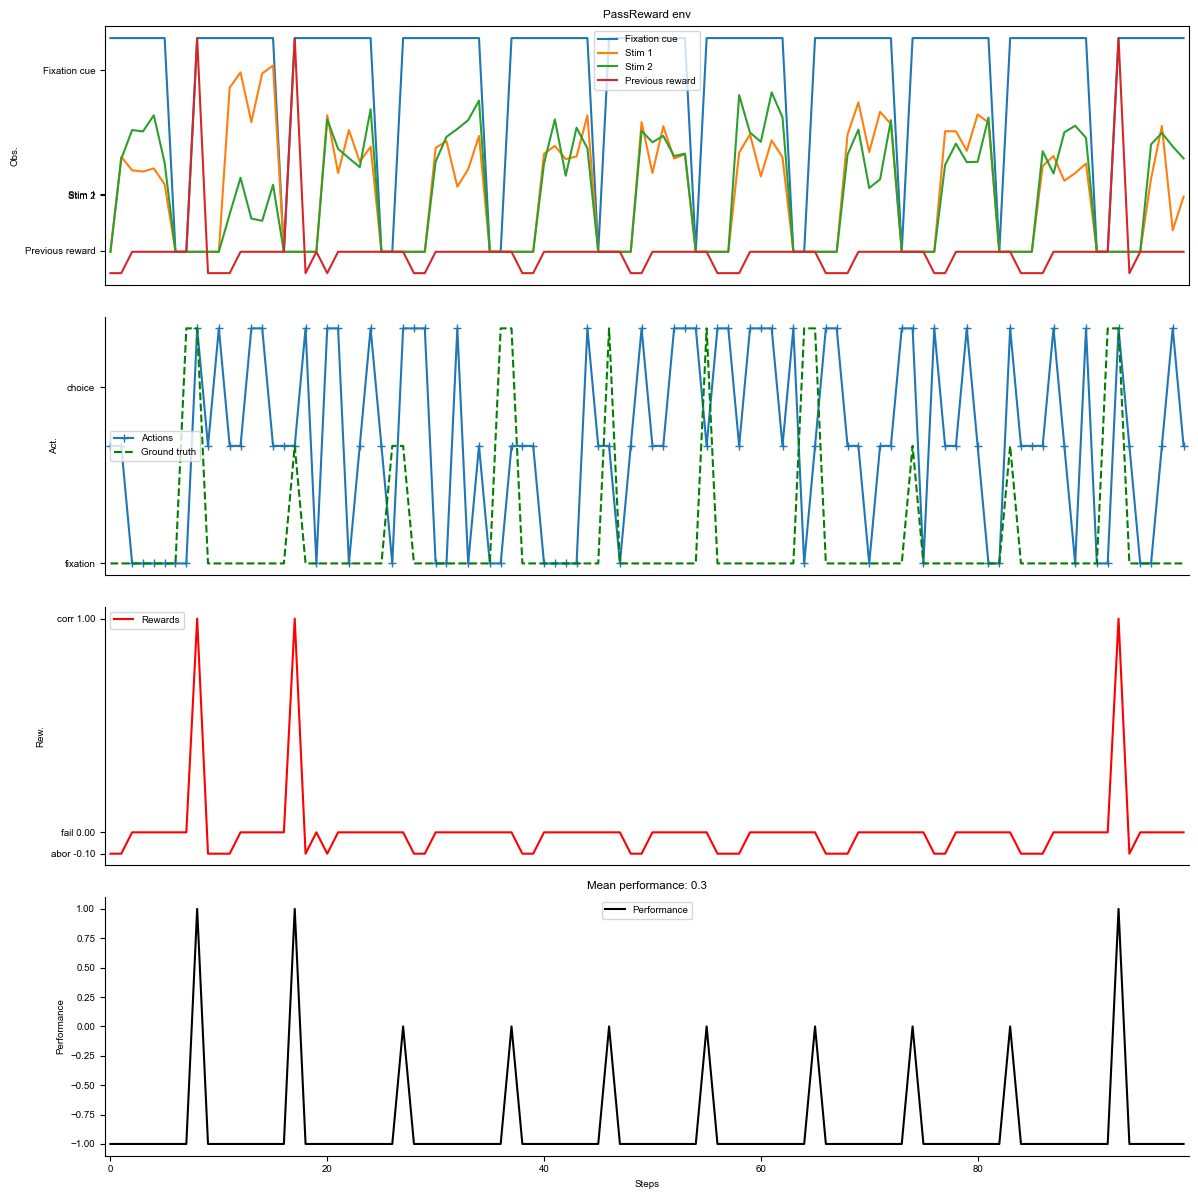

In [1]:
import gym
import neurogym as ngym
from neurogym.wrappers import pass_reward
import warnings
warnings.filterwarnings('ignore')
# Task name
name = 'PerceptualDecisionMaking-v0'
# task specification (here we only specify the duration of the different trial periods)
timing = {'fixation': ('constant', 300),
          'stimulus': ('constant', 500),
          'decision': ('constant', 300)}
kwargs = {'dt': 100, 'timing': timing}
# build task
env = gym.make(name, **kwargs)
# print task properties
print(env)
# wrapp task with pass-reward wrapper
env = pass_reward.PassReward(env)
# plot example trials with random agent
data = ngym.utils.plot_env(env, fig_kwargs={'figsize': (12, 12)}, num_steps=100, ob_traces=['Fixation cue', 'Stim 1', 'Stim 2', 'Previous reward'])

### Train a network

In [2]:
import warnings
from stable_baselines.common.policies import LstmPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C  # ACER, PPO2
warnings.filterwarnings('default')

# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
env = DummyVecEnv([lambda: env])

model = A2C(LstmPolicy, env, verbose=1, policy_kwargs={'feature_extraction':"mlp"})
model.learn(total_timesteps=100000, log_interval=1000)
env.close()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



c:\Users\xzheng321\AppData\Local\anaconda3\envs\neurogym\lib\site-packages\stable_baselines\common\vec_env\dummy_vec_env.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.buf_dones = np.zeros((self.num_envs,), dtype=np.bool)


AttributeError: module 'gym.logger' has no attribute 'MIN_LEVEL'

### Visualize results

### PerceptualDecisionMaking
Doc: Two-alternative forced choice task in which the subject has to
    integrate two stimuli to decide which one is higher on average.

    Args:
        stim_scale: Controls the difficulty of the experiment. (def: 1., float)
        sigma: float, input noise level
        dim_ring: int, dimension of ring input and output
    
Reference paper 
[The analysis of visual motion: a comparison of neuronal and psychophysical performance](https://www.jneurosci.org/content/12/12/4745)

Period timing (ms) 
fixation : constant 300
stimulus : constant 500
delay : constant 0
decision : constant 300

Reward structure 
abort : -0.1
correct : 1.0
fail : 0.0

Tags: perceptual, two-alternative, supervised.



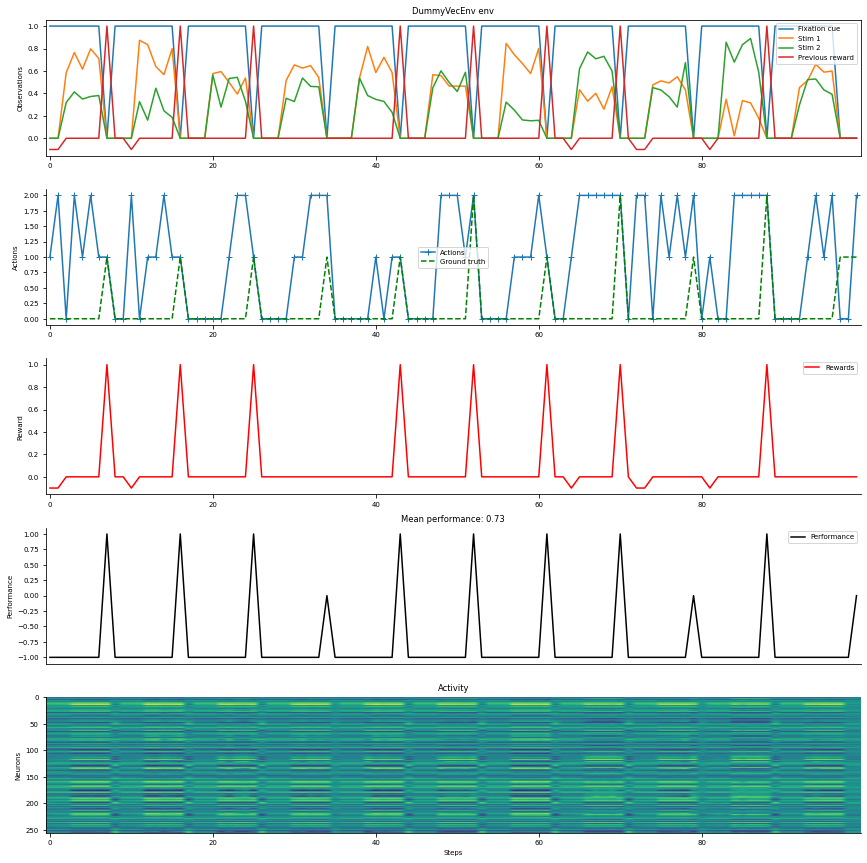

In [6]:
env = gym.make(name, **kwargs)
# print task properties
print(env)
# wrapp task with pass-reward wrapper
env = pass_reward.PassReward(env)
env = DummyVecEnv([lambda: env])
# plot example trials with random agent
data = ngym.utils.plot_env(env, fig_kwargs={'figsize': (12, 12)}, num_steps=100, ob_traces=['Fixation cue', 'Stim 1', 'Stim 2', 'Previous reward'], model=model)
